In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [39]:
df = pd.read_csv("abalone.csv", index_col = 0)
df = df.reset_index()
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [41]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell', 'Rings']

In [42]:
#df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

In [43]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

df['Sex']=label.fit_transform(df['Sex'])

In [44]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
y=df['Rings']
X=df.drop('Rings',axis=1)

In [46]:
X

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [47]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 2.195522923484396


In [50]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

Iris = load_iris()
Iris
Iris_Data = pd.DataFrame(data=Iris['data'], columns= Iris['feature_names'])
Iris_target = pd.DataFrame(data=Iris['target'],columns = ['target'])

Iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
Iris_target.replace([0,1,2],Iris['target_names'],inplace=True)


In [52]:
Iris_Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
Iris_target


,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [54]:
iris_df=Iris_Data


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume we want to predict petal length based on sepal length
X = iris_df[['sepal length (cm)']]  # Feature
y = iris_df['petal length (cm)']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [56]:
mse

0.5960765879745176

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.8304255682869869


In [58]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.743345705470597


In [59]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.7832632538985436


In [60]:
df = pd.read_csv("abalone.csv", index_col = 0)
df = df.reset_index()
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [61]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [62]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [63]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='group', ylabel='diameter'>

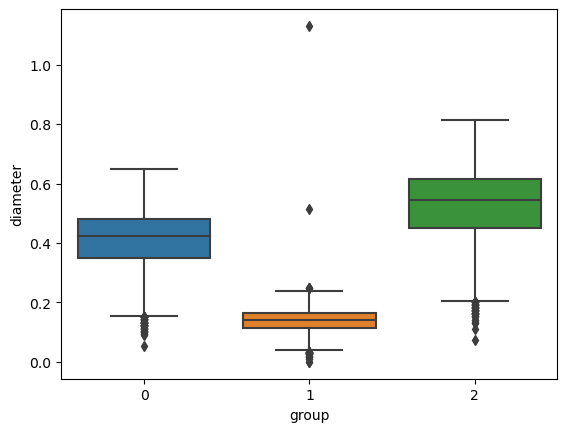

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.xlabel('group')
plt.ylabel('diameter')
sns.boxplot([df['Diameter'],df['Height'],df['Length']])


In [65]:
sec_df = df[df['Height'] < 0.4]

In [66]:
df=sec_df
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<Axes: xlabel='group', ylabel='diameter'>

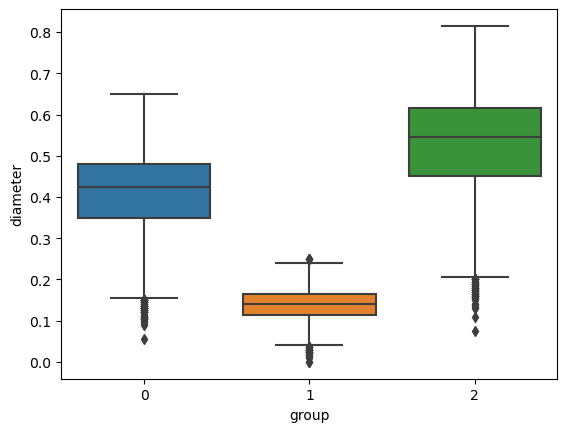

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.xlabel('group')
plt.ylabel('diameter')
sns.boxplot([df['Diameter'],df['Height'],df['Length']])


In [68]:
sec_df = df[df['Diameter'] < 0.15]
df=sec_df
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
148,I,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,I,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,I,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
305,I,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4
306,I,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
321,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
465,I,0.175,0.125,0.050,0.0235,0.0080,0.0035,0.0080,5


<Axes: xlabel='group', ylabel='diameter'>

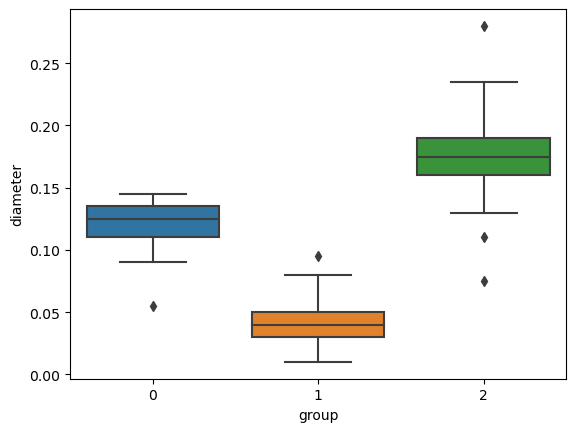

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.xlabel('group')
plt.ylabel('diameter')
sns.boxplot([df['Diameter'],df['Height'],df['Length']])


In [70]:
df.groupby('Rings').count()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,10,10,10,10,10,10,10,10
4,22,22,22,22,22,22,22,22
5,11,11,11,11,11,11,11,11
6,3,3,3,3,3,3,3,3


In [72]:
df.groupby('Rings')['Shucked weight'].mean()

Rings
1    0.001000
2    0.004500
3    0.007350
4    0.011409
5    0.015818
6    0.013667
Name: Shucked weight, dtype: float64

In [ ]:
df = pd.read_csv("abalone.csv", index_col = 0)
df = df.reset_index()
df

In [73]:
df.groupby('Rings')['Shucked weight', 'Whole weight', 'Shell weight'].mean()

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_17038/3136190708.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Rings')['Shucked weight', 'Whole weight', 'Shell weight'].mean()


,Shucked weight,Whole weight,Shell weight
Rings,,,
1,0.001000,0.002000,0.001500
2,0.004500,0.015000,0.005000
3,0.007350,0.019300,0.006950
4,0.011409,0.030136,0.009114
5,0.015818,0.040455,0.012500
6,0.013667,0.033000,0.010500


In [74]:
df.groupby('Rings')['Shell weight'].mean()

Rings
1    0.001500
2    0.005000
3    0.006950
4    0.009114
5    0.012500
6    0.010500
Name: Shell weight, dtype: float64

In [75]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
148,I,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,I,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,I,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
305,I,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4
306,I,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
321,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
465,I,0.175,0.125,0.050,0.0235,0.0080,0.0035,0.0080,5


In [ ]:
df.hist(figsize=(20,20))